# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


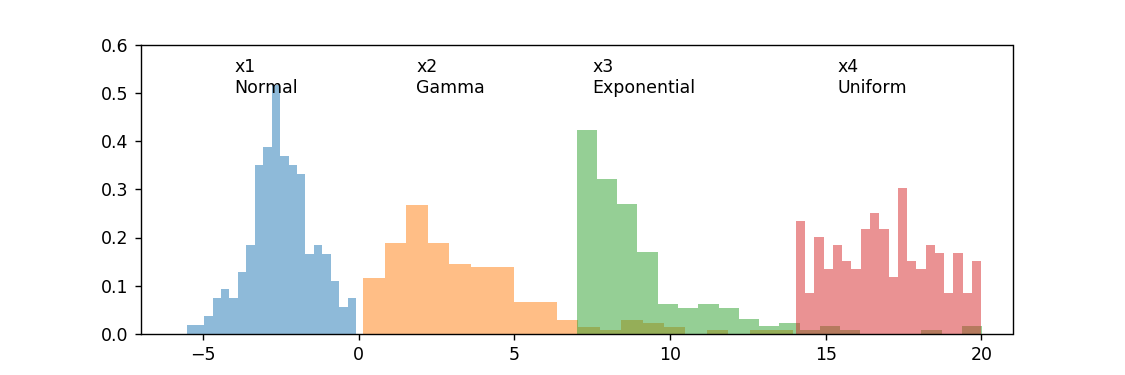

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anim

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 200)
x2 = np.random.gamma(2, 1.5, 200)
x3 = np.random.exponential(2, 200)+7
x4 = np.random.uniform(14,20, 200)
x_list= [x1,x2,x3,x4]

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


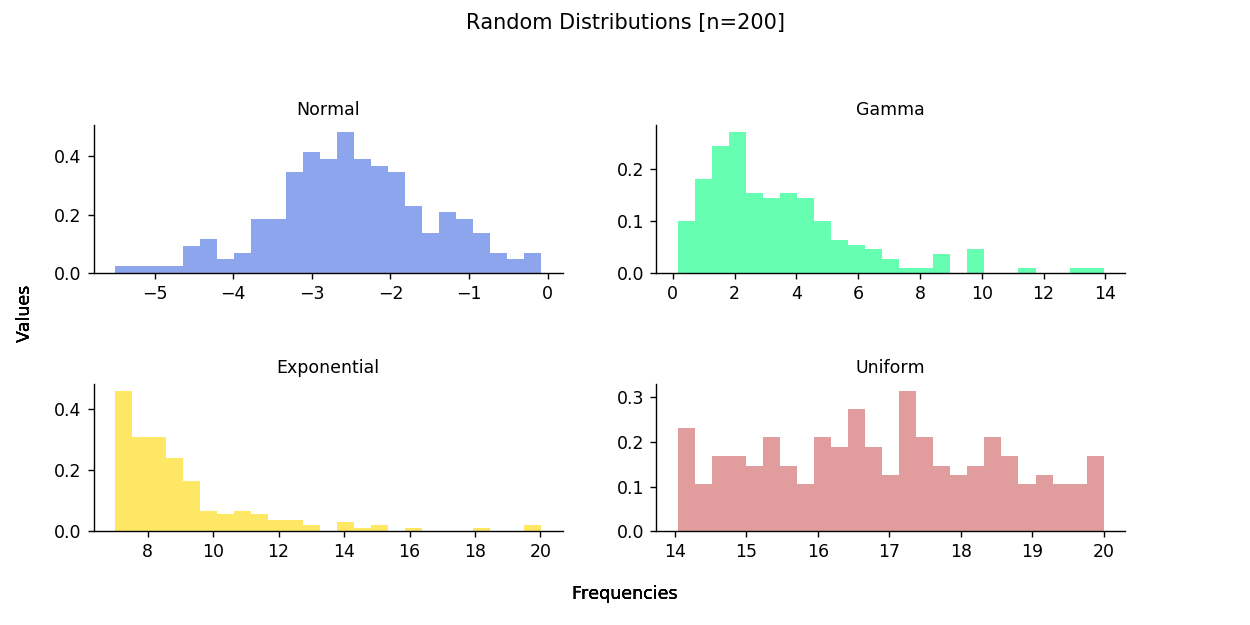

In [2]:
#def rand_subplots:

fig, ( (ax1,ax2) , (ax3,ax4 ) ) = plt.subplots(2,2, figsize=(10,5) )
axis=[ax1, ax2, ax3, ax4]
plt.subplots_adjust(hspace=0.75,top=0.8,bottom=0.15,left=0.075)

colors= ['royalblue', 'springgreen', 'gold', 'indianred' ]
subtitles=['Normal', 'Gamma', 'Exponential', 'Uniform']

# Histograms:
for ax,i in zip(axis, np.arange( np.size(axis) ) ) :
    
    ax.cla()
    # Histogram ploting
    ax.hist(x_list[i],bins=25,color=colors[i],alpha=0.6,normed=True)
    
    # Titles, subtitles and axis labels
    fig.suptitle('Random Distributions [n='+ str(np.size(x_list[i])) + ']',fontsize=12)
    fig.text(0.5,0.05,'Frequencies',ha='center',va='center')
    fig.text(0.02,0.5,'Values',ha='center',va='center',rotation='vertical')
    ax.set_title(subtitles[i],fontsize=10)
        
    # Appearance
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


In [3]:
def subplots_anim(curr):
    
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
        
    # Histograms:
    for ax,i in zip(axis, np.arange( np.size(axis) ) ) :

        ax.cla()
        # Histogram ploting
        ax.hist(x_list[i][:curr],bins=25,color=colors[i],alpha=0.6,normed=True)
        ax.set_title(subtitles[i],fontsize=10)
        
        if (curr == 1):
            # Titles, subtitles and axis labels
            fig.suptitle('Random Distributions [n='+ str(np.size(x_list[i])) + ']',fontsize=12)
            fig.text(0.5,0.05,'Frequencies',ha='center',va='center')
            fig.text(0.02,0.5,'Values',ha='center',va='center',rotation='vertical')
            
            # Appearance
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
        
    plt.annotate('n = {}'.format(curr), [1,5])
    plt.gcf().canvas.draw()

<IPython.core.display.Javascript object>


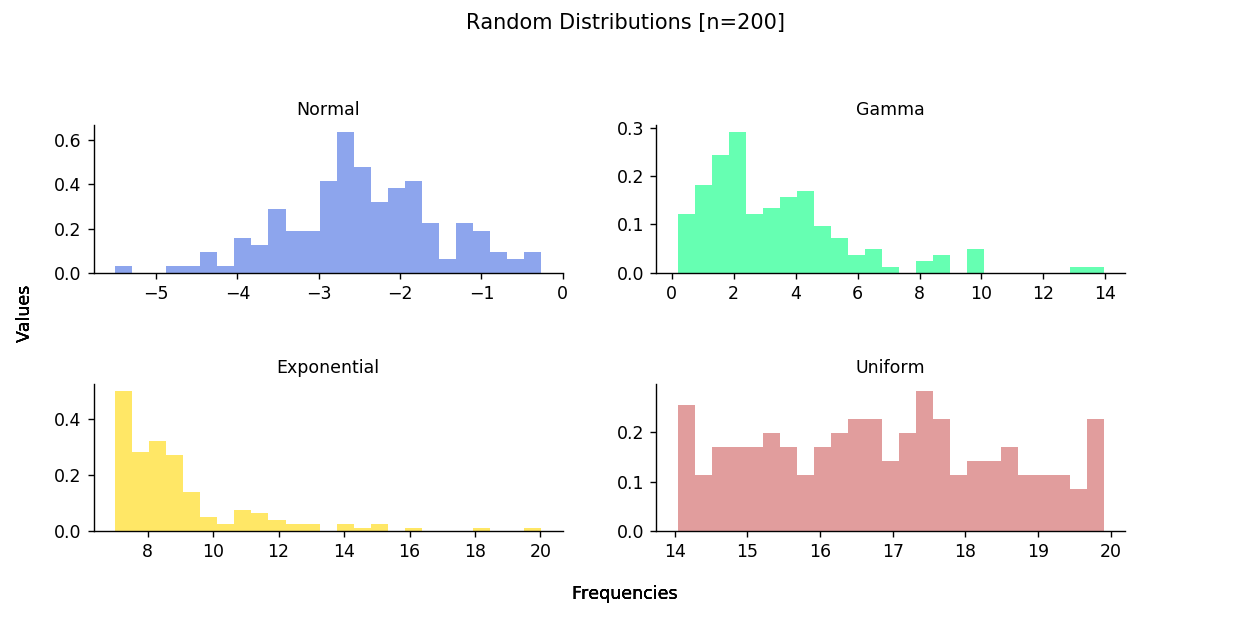

In [4]:
fig, ( (ax1,ax2) , (ax3,ax4 ) ) = plt.subplots(2,2, figsize=(10,5) )
axis=[ax1, ax2, ax3, ax4]
plt.subplots_adjust(hspace=0.75,top=0.8,bottom=0.15,left=0.075)
colors= ['royalblue', 'springgreen', 'gold', 'indianred' ]
subtitles=['Normal', 'Gamma', 'Exponential', 'Uniform']
n=np.size(x1)
# Animation
a=anim.FuncAnimation(fig,subplots_anim,interval=10,repeat=False,blit=True)